Index(['Bankrupt?', ' Operating Expense Rate',
       ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Revenue Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Long-term fund suitability ratio (A)',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Revenue per person', ' Operating profit per person',
       ' Allocation rate per person', ' Quick Assets/Current Liability',
       ' Cash/Current Liability', ' Inventory/Working Capital',
       ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets', ' Total income/Total ex

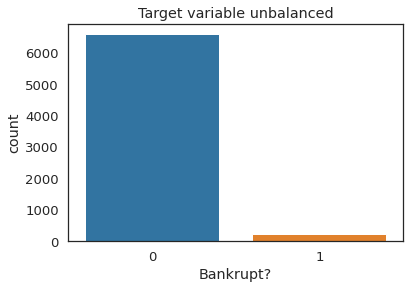

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
data = pd.read_csv('taiwan.csv.csv')
corr_data = data.corr()
high_corr = ~(corr_data.mask(np.eye(len(corr_data ), dtype=bool)).abs() > 0.5).any()
high_corr

corr_data = corr_data.loc[high_corr,high_corr]
print(corr_data.columns)
target = data['Bankrupt?']
del data['Bankrupt?']
dato = data[:1]
sns.set_style('white');
sns.set_context(context='notebook',font_scale=1.2)
sns.countplot(x=target);
plt.title('Target variable unbalanced');
SMOTE_oversample = SMOTE()
data,target = SMOTE_oversample.fit_resample(data,target)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=42)
"""
sns.set_style('white');
sns.set_context(context='notebook',font_scale=1.2)
sns.countplot(x=y_train);
plt.title('Target variable balanced');
"""
std_slc =  StandardScaler()
std_slc.fit(X_train)
X_train_std = std_slc.transform(X_train)
X_test_std = std_slc.transform(X_test)
pca = PCA(n_components=93)# adjust yourself
pca.fit(X_train_std)
X_t_train_std = pca.transform(X_train_std)
X_t_test_std = pca.transform(X_test_std)
print(y_test)

In [ ]:
early_stop =  EarlyStopping(monitor='loss',mode='max', verbose=1, patience=30,restore_best_weights=True)
model = keras.Sequential([
    layers.Dense(100 , activation='relu', input_shape=[93]),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.10),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_t_train_std, 
    y_train, 
    epochs=100, 
    batch_size=10,  
    callbacks=[early_stop]
)

Epoch 1/100
1056/1056 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.8903
Epoch 2/100
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0988 - accuracy: 0.9664
Epoch 3/100
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0556 - accuracy: 0.9841
Epoch 4/100
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0475 - accuracy: 0.9876
Epoch 5/100
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0302 - accuracy: 0.9908
Epoch 6/100
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0277 - accuracy: 0.9908
Epoch 7/100
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0166 - accuracy: 0.9940
Epoch 8/100
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0195 - accuracy: 0.9946
Epoch 9/100
1056/1056 [==============================] - 2s 2ms/step - loss: 0.0186 - accuracy: 0.9945
Epoch 10/100
1056/1056 [==============================] - 2s 2ms/step - l

In [ ]:
preds = model.predict(X_t_test_std)
scores = model.evaluate(X_t_test_std, y_test)

83/83 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9621


In [ ]:
preds.round()

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds.round())

array([[1263,   71],
       [  29, 1277]])

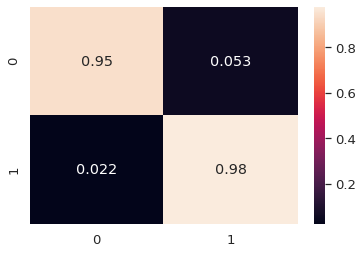

In [ ]:
sns.heatmap(confusion_matrix(y_test,preds.round(),normalize='true'), annot=True);#


In [ ]:
# Create function returning a compiled network
def create_network():
      model = keras.Sequential([
      layers.Dense(100 , activation='relu', input_shape=[93]),
      layers.Dense(100, activation='relu'),
      layers.Dropout(0.10),
      layers.Dense(100, activation='relu'),
      layers.Dense(1, activation='sigmoid'),
  ])

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

IndentationError: ignored

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import numpy

early_stop =  EarlyStopping(monitor='loss',mode='max', verbose=1, patience=30,restore_best_weights=True)

std_slc =  StandardScaler()
std_slc.fit(data)
data_std = std_slc.transform(data)
pca = PCA(n_components=93)# adjust yourself
pca.fit(data_std)
data_std = pca.transform(data_std)

# Wrap Keras model so it can be used by scikit-learn
#neural_network = KerasClassifier(build_fn=create_network, epochs=1000, batch_size=100, verbose=1, callbacks=[early_stop])
# Evaluate neural network using three-fold cross-validation
#cross_val_score(neural_network, data_std, target, cv=10)
seed = 7

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(data_std, target):
  early_stop =  EarlyStopping(monitor='loss',mode='max', verbose=1, patience=30,restore_best_weights=True)
  model = keras.Sequential([
      layers.Dense(100 , activation='relu', input_shape=[93]),
      layers.Dense(100, activation='relu'),
      layers.Dropout(0.10),
      layers.Dense(100, activation='relu'),
      layers.Dense(1, activation='sigmoid'),
  ])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(data_std[train], target[train], epochs=1000, batch_size=10, verbose=1, callbacks=[early_stop])
	# evaluate the model
  scores = model.evaluate(data_std[test], target[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


Epoch 1/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 0.2841 - accuracy: 0.8925
Epoch 2/1000
1188/1188 [==============================] - 2s 2ms/step - loss: 0.0932 - accuracy: 0.9686
Epoch 3/1000
1188/1188 [==============================] - 2s 2ms/step - loss: 0.0737 - accuracy: 0.9814
Epoch 4/1000
1188/1188 [==============================] - 2s 2ms/step - loss: 0.0450 - accuracy: 0.9869
Epoch 5/1000
1188/1188 [==============================] - 2s 2ms/step - loss: 0.0296 - accuracy: 0.9910
Epoch 6/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 0.0214 - accuracy: 0.9925
Epoch 7/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 0.0187 - accuracy: 0.9944
Epoch 8/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 0.0166 - accuracy: 0.9947
Epoch 9/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 0.0089 - accuracy: 0.9973
Epoch 10/1000
1188/1188 [==============================] - 3s 2m

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from numpy import unique
model = Sequential()
model.add(Conv1D(32, 8, activation="relu", input_shape=(93,1)))
model.add(MaxPooling1D())
#model.add(Conv1D(32, 4, activation="relu"))
#model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(93, activation="relu"))
model.add(Dense(2,activation = 'relu'))
model.compile(loss = 'binary_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 86, 32)            288       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 43, 32)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1376)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 93)                128061    
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 188       
Total params: 128,537
Trainable params: 128,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
X_t_train_std = X_t_train_std.reshape(10558, 93, 1)
early_stop =  EarlyStopping(monitor='loss',mode='max', verbose=1, patience=30,restore_best_weights=True)
model.fit(X_t_train_std , y_train, batch_size=16,epochs=100, verbose=1)#callbacks=[early_stop]
print(X_t_train_std.shape)
acc = model.evaluate(X_t_train_std, y_train)
print("Loss:", acc[0], " Accuracy:", acc[1])

Epoch 1/100
660/660 [==============================] - 2s 3ms/step - loss: 0.8424 - accuracy: 0.6477
Epoch 2/100
660/660 [==============================] - 2s 3ms/step - loss: 0.7169 - accuracy: 0.6326
Epoch 3/100
660/660 [==============================] - 2s 3ms/step - loss: 0.3313 - accuracy: 0.7185
Epoch 4/100
660/660 [==============================] - 2s 2ms/step - loss: 0.8141 - accuracy: 0.6926
Epoch 5/100
660/660 [==============================] - 2s 2ms/step - loss: 0.4805 - accuracy: 0.6194
Epoch 6/100
660/660 [==============================] - 2s 2ms/step - loss: 0.3130 - accuracy: 0.6548
Epoch 7/100
660/660 [==============================] - 2s 3ms/step - loss: 0.2209 - accuracy: 0.7087
Epoch 8/100
660/660 [==============================] - 2s 3ms/step - loss: 0.2111 - accuracy: 0.7142
Epoch 9/100
660/660 [==============================] - 2s 3ms/step - loss: 0.2522 - accuracy: 0.7871
Epoch 10/100
660/660 [==============================] - 2s 3ms/step - loss: 0.1648 - accura

In [ ]:
X_t_test_std = X_t_test_std.reshape(2640, 93, 1)

pred = model.predict(X_t_test_std)
pred_y = pred.argmax(axis=-1)
print(pred_y)
cm = confusion_matrix(y_test, pred_y)
print(cm)

[0 1 0 ... 0 1 0]
[[1306   28]
 [ 149 1157]]


In [ ]:
early_stop =  EarlyStopping(monitor='loss',mode='max', verbose=1, patience=30,restore_best_weights=True)
std_slc =  StandardScaler()
std_slc.fit(data)
data_std = std_slc.transform(data)
pca = PCA(n_components=93)# adjust yourself
pca.fit(data_std)
data_std = pca.transform(data_std)
print(data_std.shape)
data_std = data_std.reshape(13198, 93, 1)



# Wrap Keras model so it can be used by scikit-learn
#neural_network = KerasClassifier(build_fn=create_network, epochs=1000, batch_size=100, verbose=1, callbacks=[early_stop])
# Evaluate neural network using three-fold cross-validation
#cross_val_score(neural_network, data_std, target, cv=10)
seed = 7

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(data_std, target):
  early_stop =  EarlyStopping(monitor='loss',mode='max', verbose=1, patience=30,restore_best_weights=True)
  model = Sequential()
  model.add(Conv1D(32, 8, activation="relu", input_shape=(93,1)))
  model.add(MaxPooling1D())
  #model.add(Conv1D(32, 4, activation="relu"))
  #model.add(MaxPooling1D())
  model.add(Flatten())
  model.add(Dense(93, activation="relu"))
  model.add(Dense(2,activation = 'relu'))
  model.compile(loss = 'binary_crossentropy', 
      optimizer = "adam",               
                metrics = ['accuracy'])

  model.fit(data_std[train], target[train], epochs=1000, batch_size=10, verbose=1, callbacks=[early_stop])
	# evaluate the model
  scores = model.evaluate(data_std[test], target[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

(13198, 93)
Epoch 1/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 2.9545 - accuracy: 0.5779
Epoch 2/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 0.7542 - accuracy: 0.6252
Epoch 3/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 4.0485 - accuracy: 0.8085
Epoch 4/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 7.6841 - accuracy: 0.5018
Epoch 5/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 7.7131 - accuracy: 0.5000
Epoch 6/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 7.5952 - accuracy: 0.5076
Epoch 7/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 7.7232 - accuracy: 0.4993
Epoch 8/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 7.6985 - accuracy: 0.5009
Epoch 9/1000
1188/1188 [==============================] - 3s 2ms/step - loss: 7.7035 - accuracy: 0.5006
Epoch 10/1000
1188/1188 [===========================

In [ ]:
n_neighbors = 1
from sklearn.neighbors import KNeighborsClassifier
data,target = SMOTE_oversample.fit_resample(data,target)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=42)
"""
sns.set_style('white');
sns.set_context(context='notebook',font_scale=1.2)
sns.countplot(x=y_train);
plt.title('Target variable balanced');
"""
std_slc =  StandardScaler()
std_slc.fit(X_train)
X_train_std = std_slc.transform(X_train)
X_test_std = std_slc.transform(X_test)
pca = PCA(n_components=93)# adjust yourself
pca.fit(X_train_std)
X_t_train_std = pca.transform(X_train_std)
X_t_test_std = pca.transform(X_test_std)

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_t_train_std, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_t_train_std, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_t_test_std, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.97


In [ ]:
pred = knn.predict(X_t_test_std)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1245   89]
 [   2 1304]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1334
           1       0.94      1.00      0.97      1306

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640



In [ ]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
std_slc =  StandardScaler()
std_slc.fit(data)
data_std = std_slc.transform(data)
pca = PCA(n_components=93)# adjust yourself
pca.fit(data_std)
data_std = pca.transform(data_std)
scores = cross_val_score(knn, data_std, target, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.93863636 0.96590909 0.95       0.93560606 0.97575758 0.98333333
 0.97045455 0.975      0.9818044  0.97194845]
0.9648449812759896
